# Wine Data Clustering

## Color

First we will run PCA and tSNE to visualize the data by color (white or red). We will then run K-means clustering over these results and try to predict color.

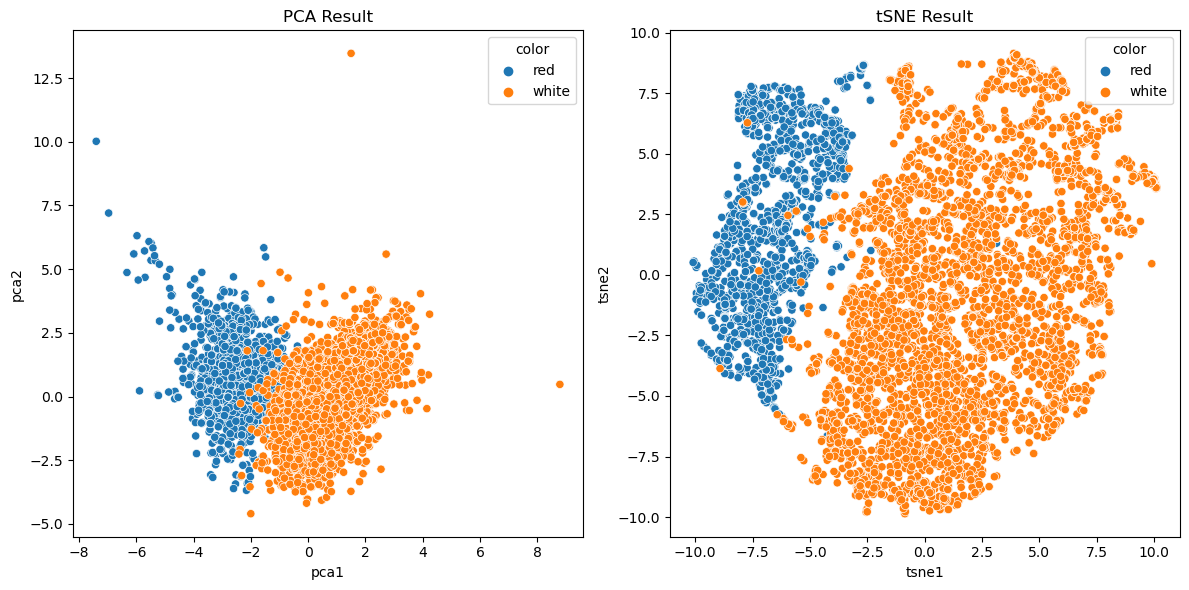

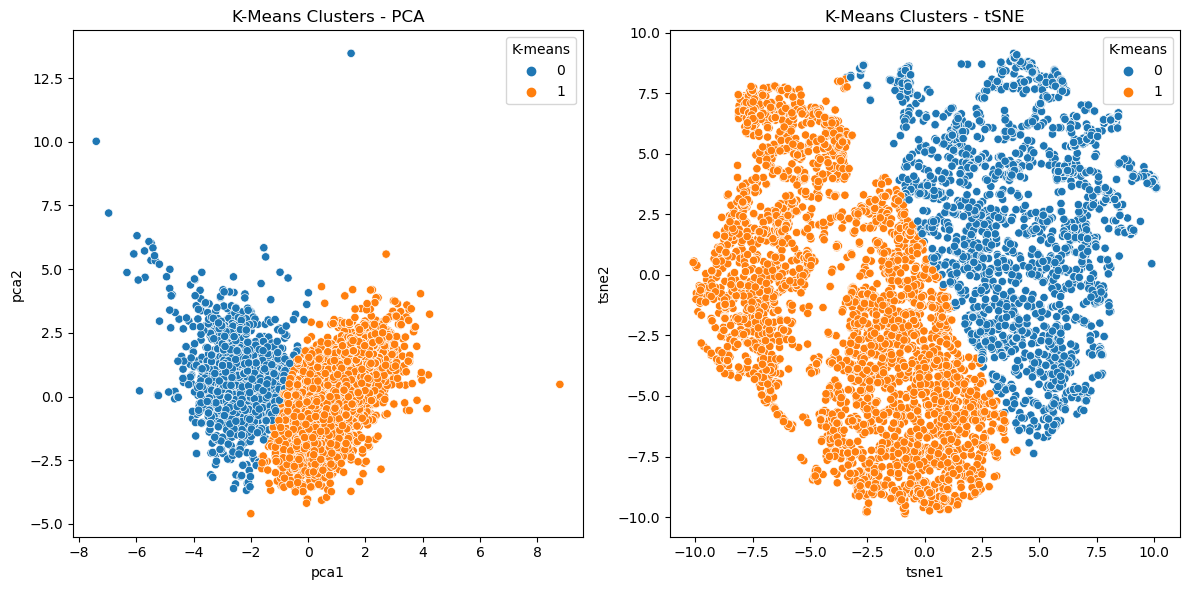

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# Load the data
wine_data = pd.read_csv('wine.csv')
#preserve this for later
quality = wine_data['quality']
# Separate the features from the 'color' and 'quality' columns
features = wine_data.drop(['color', 'quality'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Perform tSNE
tsne = TSNE(n_components=2, perplexity=50, n_iter=300)
tsne_result = tsne.fit_transform(scaled_features)

# Perform K-Means clustering
kmeans1 = KMeans(n_clusters=2, random_state=42)
kmeans2 = KMeans(n_clusters=2, random_state=27)

kmeans_result_1 = kmeans1.fit_predict(scaled_features)
kmeans_result_2 = kmeans2.fit_predict(scaled_features)


# Add PCA and tSNE results to the DataFrame for visualization
wine_data['pca1'] = pca_result[:, 0]
wine_data['pca2'] = pca_result[:, 1]
wine_data['tsne1'] = tsne_result[:, 0]
wine_data['tsne2'] = tsne_result[:, 1]
wine_data['kmeans_cluster'] = kmeans_result_1
wine_data['kmeans_cluster_2'] = kmeans_result_2

# wine_data.head(10)
pca_df = pd.DataFrame()
tsne_df = pd.DataFrame()

pca_df['pca1'] = pca_result[:, 0]
pca_df['pca2'] = pca_result[:, 1]

tsne_df['tsne1'] = tsne_result[:, 0]
tsne_df['tsne2'] = tsne_result[:, 1]

kmeans_pca = kmeans1.fit_predict(pca_df)
kmeans_tsne = kmeans2.fit_predict(tsne_df)

pca_df['K-means'] = kmeans_pca
tsne_df['K-means'] = kmeans_tsne

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pca1', y='pca2', hue='color', data=wine_data)
plt.title('PCA Result')

plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='color', data=wine_data)
plt.title('tSNE Result')

plt.tight_layout()
plt.show()

# Compare K-Means clusters with wine types and quality scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pca1', y='pca2', hue='K-means', data=pca_df)
plt.title('K-Means Clusters - PCA')

plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='K-means', data=tsne_df)
plt.title('K-Means Clusters - tSNE')

plt.tight_layout()
plt.show()


### Color - Results

Based on the above plots, we can see that both PCA and tSNE are able to portray relatively clean divisions of wine by color. K-means is pretty succussful at predicting color over the PCA results, but struggles to do so with the tSNE results, despite the visually apparent divide.

## Quality

Now we will once again visualize the data using PCA and tSNE, but this time for quality. We will then use K-means to attempt to predict quality.

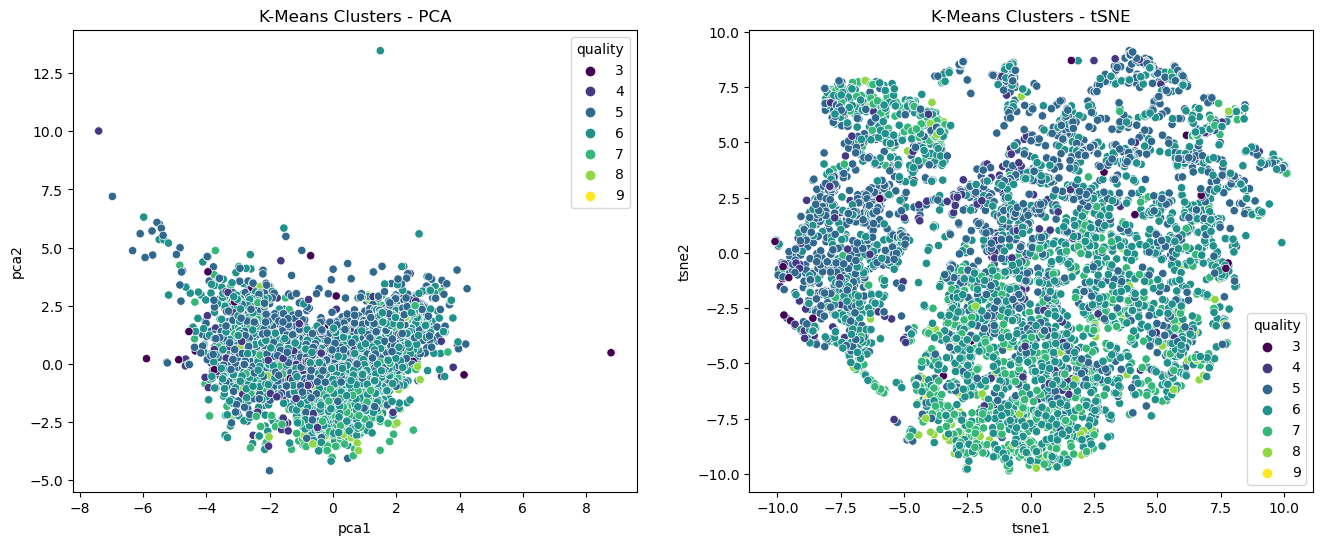

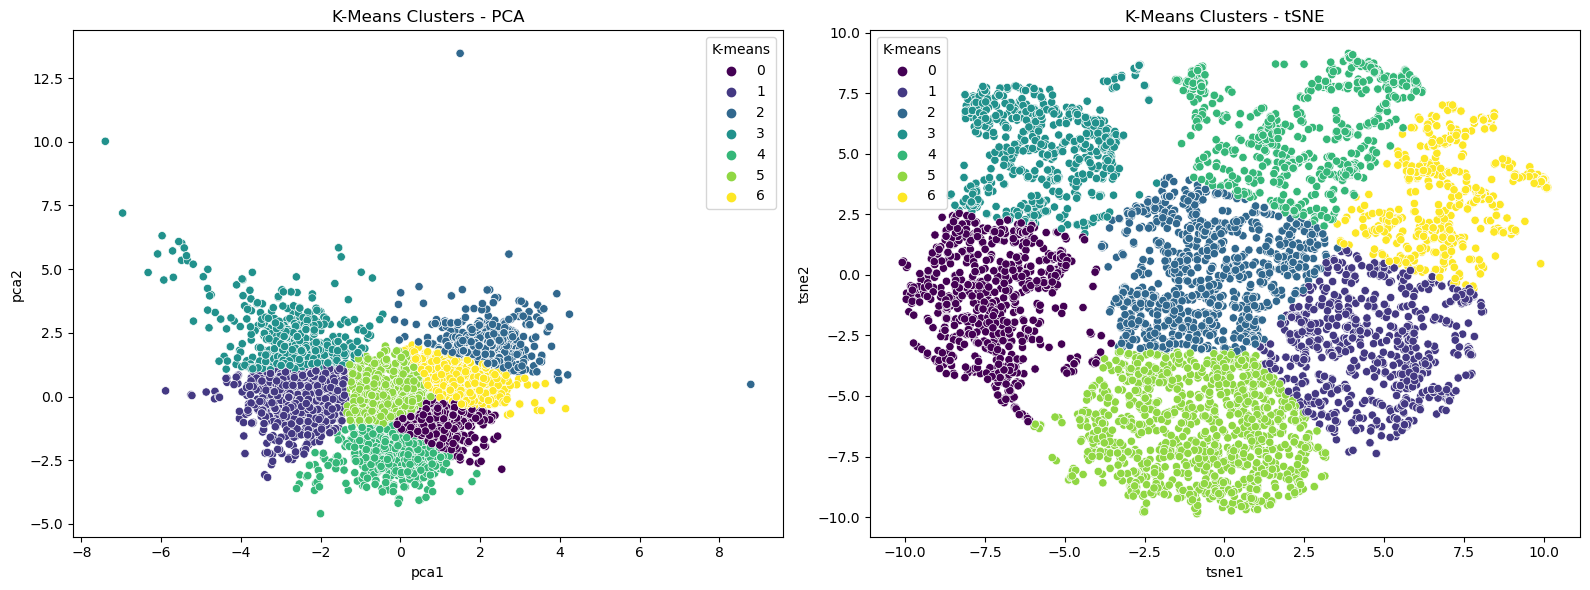

In [29]:
# Perform K-Means clustering with 7 clusters now
kmeans1 = KMeans(n_clusters=7, random_state=42)
kmeans2 = KMeans(n_clusters=7, random_state=69)

kmeans_pca = kmeans1.fit_predict(pca_result)
kmeans_tsne = kmeans2.fit_predict(tsne_result)

# Add K-Means clusters to PCA and tSNE DataFrames for visualization
pca_df = pd.DataFrame(pca_result, columns=['pca1', 'pca2'])
pca_df['K-means'] = kmeans_pca
pca_df['quality'] = quality
# pca_df.head()

tsne_df = pd.DataFrame(tsne_result, columns=['tsne1', 'tsne2'])
tsne_df['K-means'] = kmeans_tsne
tsne_df['quality'] = quality

# Visualize the results
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pca1', y='pca2', hue='quality', data=pca_df, palette='viridis')
plt.title('K-Means Clusters - PCA')

plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='quality', data=tsne_df, palette='viridis')
plt.title('K-Means Clusters - tSNE')


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='pca1', y='pca2', hue='K-means', data=pca_df, palette='viridis')
plt.title('K-Means Clusters - PCA')

plt.subplot(1, 2, 2)
sns.scatterplot(x='tsne1', y='tsne2', hue='K-means', data=tsne_df, palette='viridis')
plt.title('K-Means Clusters - tSNE')

plt.tight_layout()
plt.show()


### Quality - Results

Both PCA and tSNE results show a much less clear division based on quality as compared to what we previously observed with color. To no surprise, K-means thus struggles to predict wine quality accurately.